In [1]:
import warnings
warnings.filterwarnings("ignore")
# Augmenter la densité de pixel
import matplotlib as mpl
import scipy.stats as scpstats
mpl.rcParams['figure.dpi'] = 100
from croscor import *
import csv
import os
band1 = np.load("../data/band1.npy")
band2 = np.load("../data/band2.npy")

#

In [2]:
b1,b2 = shiftSelec(band1,band2,15,15)

In [ ]:
os.

In [24]:
p = loadParcels(16)[0]
#print(p)
print(np.max(p[:,0]) - np.min(p[:,0]))
print(np.max(p[:,1]) - np.min(p[:,1]))
print(np.mean(p[:,0]))
print(np.mean(p[:,1]))
filename = "../decoup/8f_256bs_15sx_6sy_10seuil_99accu.npy"
tab = np.load(filename)
ff = ExtractFeatures(filename)

# indice dans le tab = i * ncol + j

51
51
662.918648310388
1369.624530663329


In [ ]:
x0 = np.min(p[:,0]) - (np.max(p[:,0]) - np.min(p[:,0]))
x1 = np.max(p[:,0]) + (np.max(p[:,0]) - np.min(p[:,0]))
y0 = np.min(p[:,1]) - (np.max(p[:,1]) - np.min(p[:,1]))
y1 = np.max(p[:,1]) + (np.max(p[:,1]) - np.min(p[:,1]))

coord_zone = x0, y0, x1, y1


In [ ]:
"""
On a l'indice de vecteur donc le numéro de bloc
numéro de bloc vers coordonnées du bloc avec block size, taille de l'image, facteur de recouvrement
coord du bloc vers milieu du bloc avec bloc size
"""

In [15]:

"""
Vérifier qu'on trouve quelque chose de très proche de 0 après déplacement en refaisant un tour
ok
"""
def multichoice():
    ok = True
    choices = []
    while ok:
        choices.append(choice())
        print('\n #######')
        print("Choices :",choices)
        print('\n #######')
        cin = input('Press Enter to continue or type no')
        if cin == 'no':
            ok = False
    return choices

def versus(img1,img2):
    
    fig,ax = plt.subplots(1,2, figsize=(15,8))
    im1 = ax[0].imshow(10*np.log(img1),vmin=-40,vmax=0)
    ax[0].set_title("BAND 1 - original")
    fig.colorbar(im1,ax=ax[0])

    im2 = ax[1].imshow(10*np.log(img2),vmin=-40,vmax=0)
    ax[1].set_title("BAND 1 - déplacement")
    fig.colorbar(im2,ax=ax[1])

    plt.tight_layout()
    plt.show()

def apply_displacement(band1,coord,choices):
    img = np.copy(band1)
    (x0,x1,y0,y1) = coord
    imgs = []
    for tabname in choices:  
        features = ExtractFeatures(tabname)
        print(features["ax0"],features["ax1"])
        img = np.roll(np.roll(band1,- int(features["ax0"]),axis=0),- int(features["ax1"]),axis=1)
        tab = np.load(tabname)
        xm = np.mean(tab[0])
        ym = np.mean(tab[1])
        #print((xm,ym))
        img_new = np.roll(np.roll(img, - int(ym),axis=0), int(xm),axis=1)
        imgs.append(img_new)
    imgs.append(band1)
    return imgs#, selection(img_new,coord)

def apply_displacement2(band1,coord,tabname,parcel):
    img = np.copy(band1)
    (x0,x1,y0,y1) = coord
    imgs = []
    features = ExtractFeatures(tabname)
    print(features["ax0"],features["ax1"])
    ## On applique le shift initial correctif
    img = np.roll(np.roll(band1,- int(features["ax0"]),axis=0),- int(features["ax1"]),axis=1)
    tab = np.load(tabname)
    xm = np.mean(tab[0])
    ym = np.mean(tab[1])
    #print((xm,ym))
    img_new = np.roll(np.roll(img, - int(ym),axis=0), int(xm),axis=1)
    imgs.append(img_new)
    imgs.append(band1)
    return imgs#, selection(img_new,coord)


def pltBiomass2(imgs, choices,num,output = False): #img est l'image corrigée - rapport band2/band1-corrigee
    BiomassData = loadBiomass(num)
    band1 = np.load("../data/band1.npy")
    band2 = np.load("../data/band2.npy")
    pearsonr = []
    Parcels = loadParcels(num)
    plt.figure(1, figsize=(10,5))
    i = 0
    for tabname in choices:
        IntensityData = []
        for X in Parcels:
            img = apply_displacement2(band1,coord,tabname,X)
            
            IntensityZone_X = IntensityZone(X,band2/img)
            IntensityData.append(IntensityZone_X[0])

        sortedData = sortBiomInt(BiomassData,IntensityData)
        if output : 
            print(sortedData)
            print("---------------------------------------------")

        pearsonr.append(scpstats.pearsonr(sortedData[:,0],sortedData[:,1]))
        if i < len(choices):
            features = ExtractFeatures(choices[i])
            label = features
        else:
            label = "ref"
        plt.scatter(sortedData[:,0],sortedData[:,1], label = label)
        i += 1
    plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
    plt.ylim((-30,-10))
    plt.title("Intensité image en fonction de la biomasse sur 16 ROI de forêt")
    plt.xlabel("Qté de biomasse de 16 parcelles (Ordre croissant de qté)")
    plt.xlim((200,500))
    plt.ylabel("Intensité image parcelle")
    plt.savefig("../results/plotMaternelle1.png")
    plt.show()
    
    return pearsonr
    
    
def pltBiomass(imgs, choices,num,output = False): #img est l'image corrigée - rapport band2/band1-corrigee
    BiomassData = loadBiomass(num)
    band1 = np.load("../data/band1.npy")
    band2 = np.load("../data/band2.npy")
    pearsonr = []
    Parcels = loadParcels(num)
    plt.figure(1, figsize=(7,5))
    i = 0
    for img in imgs:
        IntensityData = []
        for X in Parcels:
            IntensityZone_X = IntensityZone(X,band2/img)
            #IntensityZone_X = IntensityZone(X,band2/img)
            IntensityData.append(IntensityZone_X[0])

        sortedData = sortBiomInt(BiomassData,IntensityData)
        if output : 
            print(sortedData)
            print("---------------------------------------------")

        pearsonr.append(scpstats.pearsonr(sortedData[:,0],sortedData[:,1]))
        if i < len(choices):
            features = ExtractFeatures(choices[i])
            label = "Compensated data"
        else:
            label = "Uncompensated data"
        plt.scatter(np.log10(sortedData[:,0]),sortedData[:,1], label = label)
        print(f'ecart type : {np.std(sortedData[:,1])}')
        i += 1
    plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
    plt.ylim((-15,-5))
    plt.title("Backscatter intensity (dB) in terms of AGB (log10) for 85 ROI")
    plt.xlabel("AGB in log10(t/ha)")
    #plt.xlim((200,500))
    plt.ylabel("Backscatter intensity in dB")
    plt.tight_layout()
    plt.savefig("../results/plotMaternelle1.png")
    plt.show()
    
    return pearsonr
    
def main(num):
    (x0,x1,y0,y1) = (30 + 2 * 256, 1054, 215 + 3 * 256, 1751)
    coord = (x0,x1,y0,y1)
    choices = choice()
    imgs = apply_displacement(band1,coord,choices)
    pearson = pltBiomass(imgs,choices,num,False)
    print("\n---------------------------------------------")

    print("\n \n Coefs de pearson :")
    wanted_keys = ['ax0', 'ax1', 'f'] # The keys you want
    for i in range(len(choices)):
        features = ExtractFeatures(choices[i])
        features_list = [(k,features[k]) for k in wanted_keys]
        print(features_list,pearson[i])
        #print(features[, pearson[i])
    print('ref', pearson[-1])
    #pearsonr = plotBiomasse(b1_new)
    #np.save('../decoup/band1_new.npy',b1_new)
    #versus(band2/b1_new,band2/band1)


Liste des résulats disponibles 

0 - 2f_256bs_-15sx_-8sy_10seuil_100accu.npy
1 - 2f_256bs_-10sx_-8sy_10seuil_100accu.npy
2 - 2f_256bs_0sx_0sy_10seuil_0accu.npy
3 - 2f_256bs_-14sx_-8sy_10seuil_100accu.npy
4 - zone_foret_old
5 - band1_new.npy
6 - image_totale
7 - samedi
8 - 20f_256bs_15sx_15sy_10seuil_89accu.npy
9 - *2f_256bs_15sx_15sy_10seuil_54accu.npy
10 - 2f_256bs_15sx_15sy_10seuil_66accu.npy
11 - 2f_256bs_15sx_15sy_10seuil_79accu.npy
12 - 2f_256bs_15sx_15sy_10seuil_80accu.npy
13 - 2f_256bs_15sx_15sy_10seuil_95accu.npy
14 - 3f_256bs_15sx_15sy_10seuil_100accu.npy
15 - 3f_256bs_15sx_15sy_10seuil_91accu.npy
16 - 3f_256bs_15sx_15sy_10seuil_95accu.npy
17 - 4f_256bs_15sx_15sy_10seuil_83accu.npy
18 - 4f_256bs_15sx_15sy_10seuil_88accu.npy
19 - 4f_256bs_15sx_15sy_10seuil_91accu.npy
20 - 8f_256bs_0sx_0sy_10seuil_0accu.npy
21 - 8f_256bs_15sx_15sy_10seuil_89accu.npy
22 - 8f_256bs_15sx_6sy_10seuil_99accu.npy

 ## Pour mettre fin à la sélection, appuyer sur entré sans entrer de numéro ##

Selectio

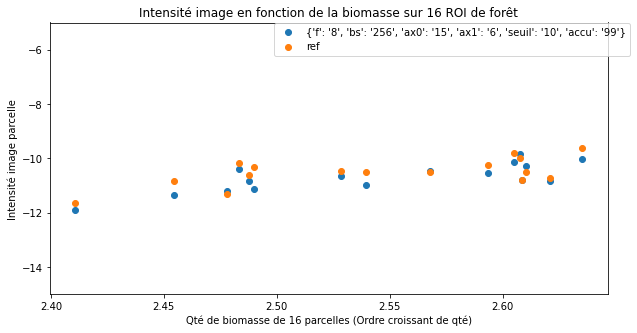


---------------------------------------------

 
 Coefs de pearson :
[('ax0', '15'), ('ax1', '6'), ('f', '8')] (0.768566041682162, 0.0005040793887875772)
ref (0.6200942242169901, 0.010392037672546423)


In [24]:
main(16)

Liste des résulats disponibles 

0 - 2f_256bs_-15sx_-8sy_10seuil_100accu.npy
1 - 2f_256bs_-10sx_-8sy_10seuil_100accu.npy
2 - 2f_256bs_0sx_0sy_10seuil_0accu.npy
3 - 2f_256bs_-14sx_-8sy_10seuil_100accu.npy
4 - zone_foret_old
5 - band1_new.npy
6 - image_totale
7 - samedi
8 - 20f_256bs_15sx_15sy_10seuil_89accu.npy
9 - *2f_256bs_15sx_15sy_10seuil_54accu.npy
10 - 2f_256bs_15sx_15sy_10seuil_66accu.npy
11 - 2f_256bs_15sx_15sy_10seuil_79accu.npy
12 - 2f_256bs_15sx_15sy_10seuil_80accu.npy
13 - 2f_256bs_15sx_15sy_10seuil_95accu.npy
14 - 3f_256bs_15sx_15sy_10seuil_100accu.npy
15 - 3f_256bs_15sx_15sy_10seuil_91accu.npy
16 - 3f_256bs_15sx_15sy_10seuil_95accu.npy
17 - 4f_256bs_15sx_15sy_10seuil_83accu.npy
18 - 4f_256bs_15sx_15sy_10seuil_88accu.npy
19 - 4f_256bs_15sx_15sy_10seuil_91accu.npy
20 - 8f_256bs_0sx_0sy_10seuil_0accu.npy
21 - 8f_256bs_15sx_15sy_10seuil_89accu.npy
22 - 8f_256bs_15sx_6sy_10seuil_99accu.npy

 ## Pour mettre fin à la sélection, appuyer sur entré sans entrer de numéro ##

Selectio

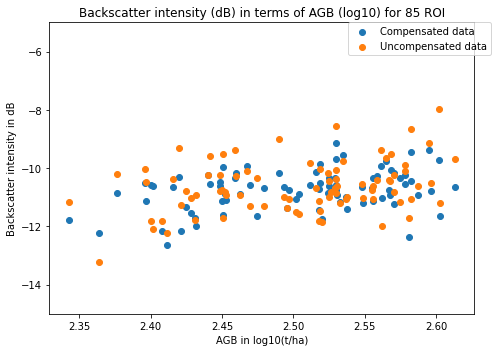


---------------------------------------------

 
 Coefs de pearson :
[('ax0', '15'), ('ax1', '6'), ('f', '8')] (0.3556913438327623, 0.0008356192986918368)
ref (0.3075586346069711, 0.0041923115686764425)


In [17]:
main(85)

Liste des résulats disponibles 

0 - 2f_256bs_-15sx_-8sy_10seuil_100accu.npy
1 - 2f_256bs_-10sx_-8sy_10seuil_100accu.npy
2 - 2f_256bs_0sx_0sy_10seuil_0accu.npy
3 - 2f_256bs_-14sx_-8sy_10seuil_100accu.npy
4 - zone_foret_old
5 - band1_new.npy
6 - image_totale
7 - samedi
8 - 20f_256bs_15sx_15sy_10seuil_89accu.npy
9 - *2f_256bs_15sx_15sy_10seuil_54accu.npy
10 - 2f_256bs_15sx_15sy_10seuil_66accu.npy
11 - 2f_256bs_15sx_15sy_10seuil_79accu.npy
12 - 2f_256bs_15sx_15sy_10seuil_80accu.npy
13 - 2f_256bs_15sx_15sy_10seuil_95accu.npy
14 - 3f_256bs_15sx_15sy_10seuil_100accu.npy
15 - 3f_256bs_15sx_15sy_10seuil_91accu.npy
16 - 3f_256bs_15sx_15sy_10seuil_95accu.npy
17 - 4f_256bs_15sx_15sy_10seuil_83accu.npy
18 - 4f_256bs_15sx_15sy_10seuil_88accu.npy
19 - 4f_256bs_15sx_15sy_10seuil_91accu.npy
20 - 8f_256bs_0sx_0sy_10seuil_0accu.npy
21 - 8f_256bs_15sx_15sy_10seuil_89accu.npy
22 - 8f_256bs_15sx_6sy_10seuil_99accu.npy

 ## Pour mettre fin à la sélection, appuyer sur entré sans entrer de numéro ##

Selectio

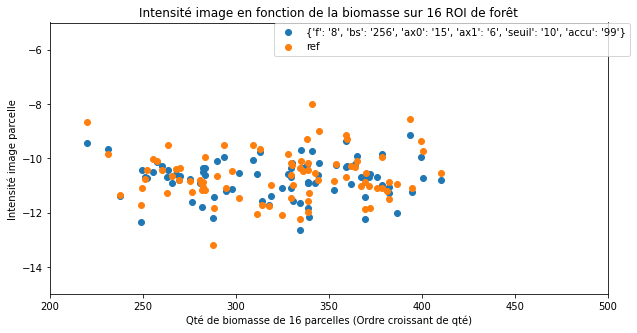


---------------------------------------------

 
 Coefs de pearson :
[('ax0', '15'), ('ax1', '6'), ('f', '8')] (-0.020341684954389403, 0.8533989581959261)
ref (0.05887376277510037, 0.5924997179327312)


In [19]:
main(85)

In [13]:
filenames = choiceSimple("../data/"+str(85)+"ROI/",all=True)
for i in filenames:
    print(i)

indcsROI_01h1.dat
indcsROI_01h2.dat
indcsROI_01h3.dat
indcsROI_01h4.dat
indcsROI_02h1.dat
indcsROI_02h2.dat
indcsROI_02h3.dat
indcsROI_02h4.dat
indcsROI_03h1.dat
indcsROI_03h2.dat
indcsROI_03h3.dat
indcsROI_03h4.dat
indcsROI_04h1.dat
indcsROI_04h2.dat
indcsROI_04h3.dat
indcsROI_04h4.dat
indcsROI_05h1.dat
indcsROI_05h2.dat
indcsROI_05h3.dat
indcsROI_05h4.dat
indcsROI_06h1.dat
indcsROI_06h2.dat
indcsROI_06h3.dat
indcsROI_06h4.dat
indcsROI_07h1.dat
indcsROI_07h2.dat
indcsROI_07h3.dat
indcsROI_07h4.dat
indcsROI_08h1.dat
indcsROI_08h2.dat
indcsROI_08h3.dat
indcsROI_08h4.dat
indcsROI_09h1.dat
indcsROI_09h2.dat
indcsROI_09h3.dat
indcsROI_09h4.dat
indcsROI_10h1.dat
indcsROI_10h2.dat
indcsROI_10h3.dat
indcsROI_10h4.dat
indcsROI_11h1.dat
indcsROI_11h2.dat
indcsROI_11h3.dat
indcsROI_11h4.dat
indcsROI_12h1.dat
indcsROI_12h2.dat
indcsROI_12h3.dat
indcsROI_12h4.dat
indcsROI_13h1.dat
indcsROI_13h2.dat
indcsROI_13h3.dat
indcsROI_13h4.dat
indcsROI_14h1.dat
indcsROI_14h2.dat
indcsROI_14h3.dat
indcsROI_1

In [14]:
parcels = []
for filename in filenames:
    parcels.append(np.loadtxt("../data/"+str(85)+"ROI/"+filename))
print([x.astype(int) for x in parcels])

[array([[ 662, 1370],
       [ 660, 1371],
       [ 661, 1371],
       [ 662, 1371],
       [ 663, 1371],
       [ 657, 1372],
       [ 658, 1372],
       [ 659, 1372],
       [ 660, 1372],
       [ 661, 1372],
       [ 662, 1372],
       [ 663, 1372],
       [ 655, 1373],
       [ 656, 1373],
       [ 657, 1373],
       [ 658, 1373],
       [ 659, 1373],
       [ 660, 1373],
       [ 661, 1373],
       [ 662, 1373],
       [ 663, 1373],
       [ 653, 1374],
       [ 654, 1374],
       [ 655, 1374],
       [ 656, 1374],
       [ 657, 1374],
       [ 658, 1374],
       [ 659, 1374],
       [ 660, 1374],
       [ 661, 1374],
       [ 662, 1374],
       [ 663, 1374],
       [ 664, 1374],
       [ 651, 1375],
       [ 652, 1375],
       [ 653, 1375],
       [ 654, 1375],
       [ 655, 1375],
       [ 656, 1375],
       [ 657, 1375],
       [ 658, 1375],
       [ 659, 1375],
       [ 660, 1375],
       [ 661, 1375],
       [ 662, 1375],
       [ 663, 1375],
       [ 664, 1375],
       [ 648

In [ ]:
"""
db en ordonnée
corrélation en fonction du log10 de la biomasse
Appliquer à toute une image (déplacement élastique)
"""

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


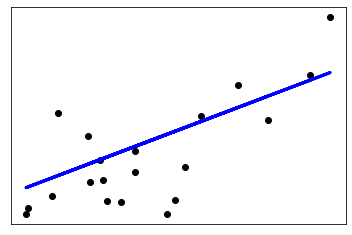

In [8]:


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
regr.predict(diabetes_X_test)